In [1]:
import sys
import os
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import json

project_root = os.path.dirname(os.path.abspath(os.getcwd()))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
# Constants
data_location = r"C:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\results\final"
folders = [name for name in os.listdir(data_location)]
# Go one level deeper and get every pair of (folder, subfolder)
folder_pairs = []
for folder in folders:
    folder_path = os.path.join(data_location, folder)
    if os.path.isdir(folder_path):
        subfolders = [name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]
        for subfolder in subfolders:
            folder_pairs.append((folder, subfolder))
print(folder_pairs)

[('orderbooks', 'AAPL'), ('orderbooks', 'BAC'), ('orderbooks', 'GOOG'), ('orderbooks', 'JPM'), ('orderbooks', 'META'), ('orderbooks', 'MSFT'), ('orderbooks', 'MTCH'), ('orderbooks', 'NFLX'), ('orderbooks', 'NVDA'), ('orderbooks', 'ORCL'), ('orderbooks', 'PLTR'), ('orderbooks', 'TSLA'), ('orderfixedvol', 'AAPL'), ('orderfixedvol', 'BAC'), ('orderfixedvol', 'GOOG'), ('orderfixedvol', 'JPM'), ('orderfixedvol', 'META'), ('orderfixedvol', 'MSFT'), ('orderfixedvol', 'MTCH'), ('orderfixedvol', 'NFLX'), ('orderfixedvol', 'NVDA'), ('orderfixedvol', 'ORCL'), ('orderfixedvol', 'PLTR'), ('orderfixedvol', 'TSLA'), ('orderflows', 'AAPL'), ('orderflows', 'BAC'), ('orderflows', 'GOOG'), ('orderflows', 'JPM'), ('orderflows', 'META'), ('orderflows', 'MSFT'), ('orderflows', 'MTCH'), ('orderflows', 'NFLX'), ('orderflows', 'NVDA'), ('orderflows', 'ORCL'), ('orderflows', 'PLTR'), ('orderflows', 'TSLA'), ('ordervol', 'AAPL'), ('ordervol', 'BAC'), ('ordervol', 'GOOG'), ('ordervol', 'JPM'), ('ordervol', 'META'

In [3]:
json_files = [
    {'Representation': representation, 'Ticker': ticker, 'File': f}
    for representation, ticker in folder_pairs
    for f in glob.glob(os.path.join(data_location, representation, ticker, "*.json"))
]

# Load and flatten all JSON files into a single list of records
def flatten_record(entry):
    with open(entry['File'], 'r') as file:
        data = json.load(file)
        records = data if isinstance(data, list) else [data]
        for record in records:
            record.update({'Representation': entry['Representation'], 'Ticker': entry['Ticker']})
            # Flatten nested dicts
            for key in ['meta', 'metrics', 'metricsStrength']:
                if key in record and isinstance(record[key], dict):
                    for k, v in record[key].items():
                        record[f"{key}.{k}"] = v
            yield record

all_data = [rec for entry in json_files for rec in flatten_record(entry)]

joined_df = pd.DataFrame(all_data)
# Reorder columns so that 'Representation' and 'Ticker' are first
cols = ['Representation', 'Ticker'] + [col for col in joined_df.columns if col not in ['Representation', 'Ticker']]
joined_df = joined_df[cols]
data = joined_df.copy()
data

,Representation,Ticker,run_id,datetime,meta,metrics,metricsStrength,meta.model,meta.modelKwargs,meta.numEpoch,...,metricsStrength.accuracy@1%_coverage,metricsStrength.accuracy@5%_coverage,metricsStrength.accuracy@10%_coverage,metricsStrength.accuracy@25%_coverage,metricsStrength.accuracy@50%_coverage,metrics.accuracy,metrics.precision,metrics.recall,metrics.f1,metrics.confusion_matrix
0,orderbooks,AAPL,4Wsd4iYd,2025-08-25 14:15:36,"{'model': 'deepLOBREG_TF', 'modelKwargs': {'sh...","{'MSE': 0.3748973309993744, 'R2': 0.0646546483...","{'accuracy@>0.1': 0.591973452245152, 'coverage...",deepLOBREG_TF,"{'shape': [100, 40, 1]}",10,...,0.730000,0.669867,0.646533,0.620080,0.601920,NaN,NaN,NaN,NaN,NaN
1,orderbooks,AAPL,5e3sUEfh,2025-08-25 14:04:51,"{'model': 'deepLOBREG_TF', 'modelKwargs': {'sh...","{'MSE': 0.30941274762153625, 'R2': 0.067917883...","{'accuracy@>0.1': 0.5410307830008044, 'coverag...",deepLOBREG_TF,"{'shape': [100, 40, 1]}",10,...,0.542000,0.493067,0.495933,0.521733,0.541240,NaN,NaN,NaN,NaN,NaN
2,orderbooks,AAPL,84c0kMhZ,2025-08-25 15:08:47,"{'model': 'deepLOBREG_TF', 'modelKwargs': {'sh...","{'MSE': 0.8273724913597107, 'R2': -0.764856815...","{'accuracy@>0.1': 0.5066348063993892, 'coverag...",deepLOBREG_TF,"{'shape': [100, 40, 1]}",10,...,0.665333,0.521067,0.507867,0.510560,0.512827,NaN,NaN,NaN,NaN,NaN
3,orderbooks,AAPL,aagNnLGZ,2025-08-25 14:47:45,"{'model': 'deepLOBREG_TF', 'modelKwargs': {'sh...","{'MSE': 0.545924186706543, 'R2': -0.1530144214...","{'accuracy@>0.1': 0.4974676371106271, 'coverag...",deepLOBREG_TF,"{'shape': [100, 40, 1]}",10,...,0.446000,0.531333,0.534333,0.508907,0.498080,NaN,NaN,NaN,NaN,NaN
4,orderbooks,AAPL,AncNcPna,2025-08-25 14:55:09,"{'model': 'deepLOB_TF', 'modelKwargs': {'shape...","{'accuracy': 0.3095466666666667, 'precision': ...","{'accuracy@>0.4': 0.3095394496752062, 'coverag...",deepLOB_TF,"{'shape': [100, 40, 1]}",10,...,0.380000,0.356933,0.335800,0.326693,0.320333,0.309547,0.328364,0.330291,0.251791,"[[28260, 210, 15689], [34902, 306, 18886], [33..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,ordervol,TSLA,t2Oeaoiv,2025-08-25 18:21:32,"{'model': 'deepLOB_TF', 'modelKwargs': {'shape...","{'accuracy': 0.37104446742502584, 'precision':...","{'accuracy@>0.4': 0.3845522171770843, 'coverag...",deepLOB_TF,"{'shape': [100, 20, 1]}",10,...,0.387850,0.418868,0.416600,0.410451,0.393438,0.371044,0.364611,0.375568,0.316004,"[[29829, 1340, 19396], [26284, 1868, 23386], [..."
668,ordervol,TSLA,v6iMrnWX,2025-08-26 16:10:27,"{'model': 'deepLOBREG_TF', 'modelKwargs': {'sh...","{'MSE': 0.4466748535633087, 'R2': -0.018121957...","{'accuracy@>0.1': 0.5507701201635214, 'coverag...",deepLOBREG_TF,"{'shape': [100, 20, 1]}",10,...,0.560748,0.571524,0.580197,0.570601,0.553081,NaN,NaN,NaN,NaN,NaN
669,ordervol,TSLA,WlPVwbxw,2025-08-26 14:16:37,"{'model': 'deepLOBREG_TF', 'modelKwargs': {'sh...","{'MSE': 0.2274702489376068, 'R2': 0.1374690532...","{'accuracy@>0.1': 0.6401586822789554, 'coverag...",deepLOBREG_TF,"{'shape': [100, 20, 1]}",10,...,0.869246,0.787810,0.766953,0.715947,0.670876,NaN,NaN,NaN,NaN,NaN
670,ordervol,TSLA,yOgy7ph1,2025-08-25 17:41:23,"{'model': 'deepLOB_TF', 'modelKwargs': {'shape...","{'accuracy': 0.41518092379523097, 'precision':...","{'accuracy@>0.4': 0.4377919542634037, 'coverag...",deepLOB_TF,"{'shape': [100, 20, 1]}",10,...,0.632422,0.568837,0.538687,0.498893,0.466130,0.415181,0.276250,0.423663,0.334241,"[[27396, 0, 18872], [23535, 0, 28787], [16485,..."


In [4]:
print(data.columns)

Index(['Representation', 'Ticker', 'run_id', 'datetime', 'meta', 'metrics',
       'metricsStrength', 'meta.model', 'meta.modelKwargs', 'meta.numEpoch',
       'meta.batchSize', 'meta.ticker', 'meta.steps', 'meta.maxFiles',
       'meta.scaling', 'meta.threshold', 'meta.rowLim', 'meta.trainTestSplit',
       'meta.lookForwardHorizon', 'meta.representation', 'meta.labelType',
       'meta.archive', 'metrics.MSE', 'metrics.R2', 'metrics.MAPE',
       'metrics.MAE', 'metricsStrength.accuracy@>0.1',
       'metricsStrength.coverage@>0.1', 'metricsStrength.accuracy@>0.2',
       'metricsStrength.coverage@>0.2', 'metricsStrength.accuracy@>0.3',
       'metricsStrength.coverage@>0.3', 'metricsStrength.accuracy@>0.4',
       'metricsStrength.coverage@>0.4', 'metricsStrength.accuracy@>0.5',
       'metricsStrength.coverage@>0.5', 'metricsStrength.accuracy@>0.6',
       'metricsStrength.coverage@>0.6', 'metricsStrength.accuracy@>0.7',
       'metricsStrength.coverage@>0.7', 'metricsStrength.accu

In [5]:
data.groupby(['Representation', 'Ticker', 'meta.labelType'])['meta.lookForwardHorizon'].agg(lambda x: ','.join(map(str, sorted(x))))

Representation  Ticker  meta.labelType
orderbooks      AAPL    CATEGORICAL       10,20,40,60,80,100,200
                        REGRESSION        10,20,40,60,80,100,200
                BAC     CATEGORICAL       10,20,40,60,80,100,200
                        REGRESSION        10,20,40,60,80,100,200
                GOOG    CATEGORICAL       10,20,40,60,80,100,200
                                                   ...          
ordervol        ORCL    REGRESSION        10,20,40,60,80,100,200
                PLTR    CATEGORICAL       10,20,40,60,80,100,200
                        REGRESSION        10,20,40,60,80,100,200
                TSLA    CATEGORICAL       10,20,40,60,80,100,200
                        REGRESSION        10,20,40,60,80,100,200
Name: meta.lookForwardHorizon, Length: 96, dtype: object

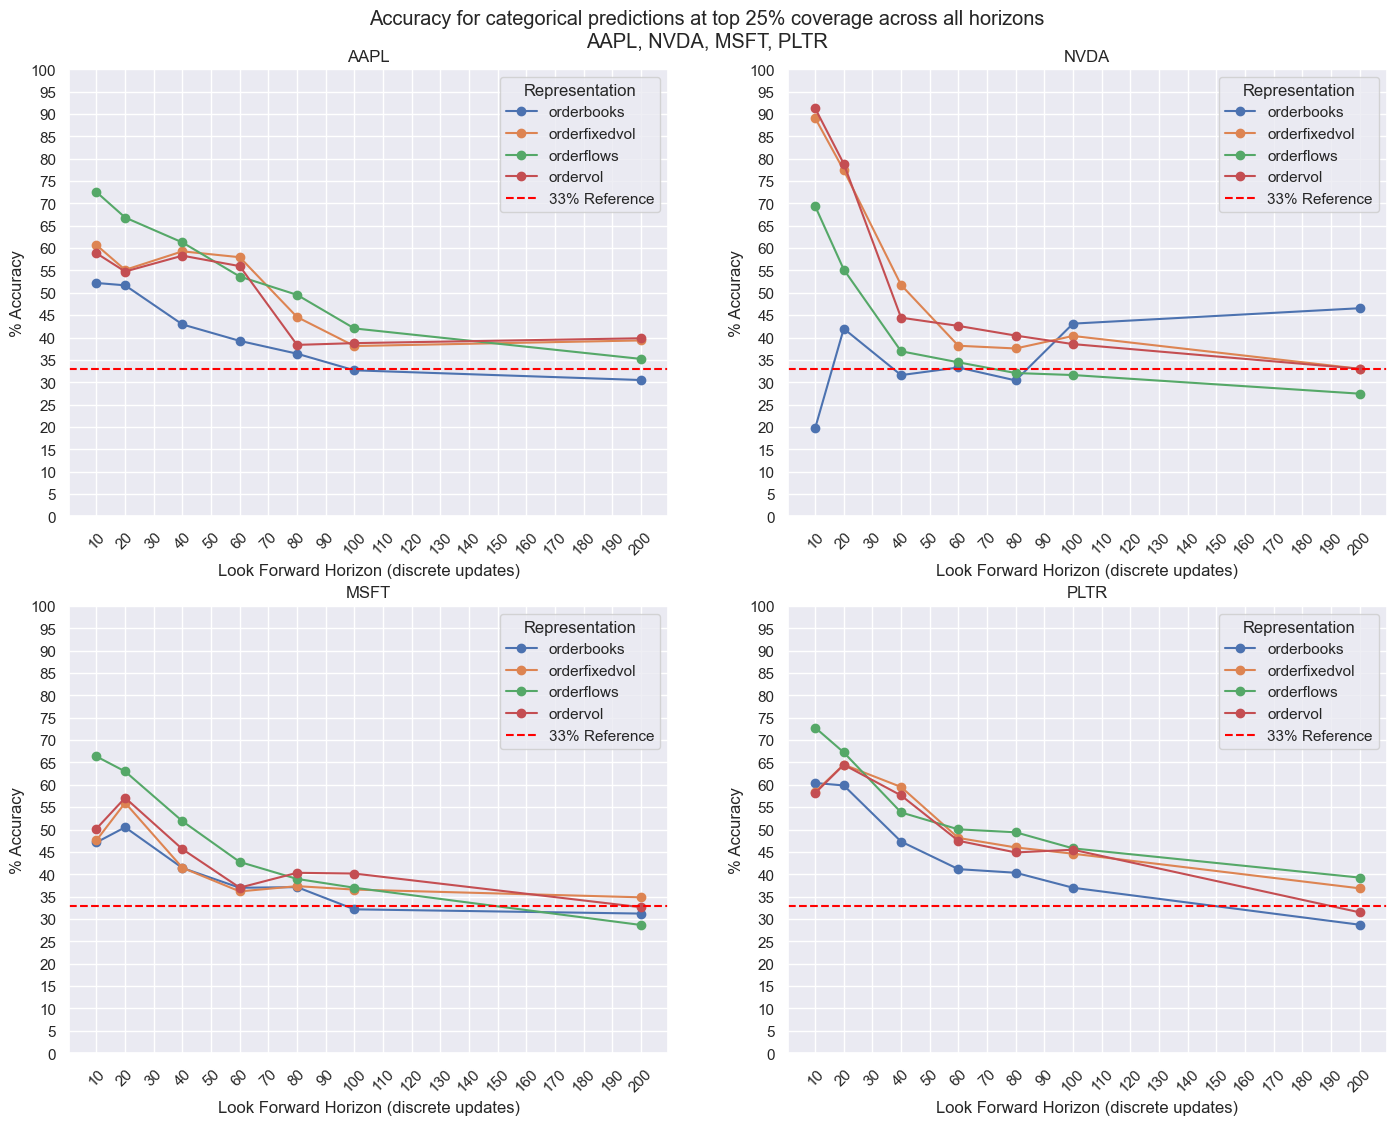

In [57]:
# Plotting
# ticker = 'NVDA'
tickers = ['AAPL', 'NVDA', 'MSFT', 'PLTR']
labelType = 'CATEGORICAL'
y_axis_col = 'metricsStrength.accuracy@25%_coverage'
x_axis_col = 'meta.lookForwardHorizon'

fig, axes = plt.subplots(2, 2, figsize=(17, 12), sharey=False)
sns.set()
for ax, ticker in zip(axes.flatten(), tickers):
    filtered = data.loc[
        (data['meta.ticker'] == ticker) &
        (data['meta.labelType'] == labelType)
    ]
    df = filtered[['Ticker', 'meta.representation', x_axis_col, y_axis_col]]
    for rep in df['meta.representation'].unique():
        subset = df[df['meta.representation'] == rep].sort_values(by=x_axis_col)
        ax.plot(subset[x_axis_col], subset[y_axis_col] * 100, marker='o', label=rep)
    ax.set_xlabel("Look Forward Horizon (discrete updates)")
    ax.set_title(f"{ticker}")
    ax.grid(True)
    axHeight = 33 if labelType == 'CATEGORICAL' else 50
    ax.axhline(axHeight, color='red', linestyle='--', label=f'{int(axHeight)}% Reference')
    ax.legend(title="Representation")
    ax.set_ylabel("% Accuracy")
    ax.set_yticks(np.arange(0, 1.05, 0.05) * 100)
    plt.setp(ax.get_xticklabels(), rotation=45)
    ax.set_xticks(np.arange(10, 210, 10))

fig.suptitle(f"Accuracy for categorical predictions at top 25% coverage across all horizons\n{', '.join(tickers)}")
plt.subplots_adjust(top=0.93)
plt.show()

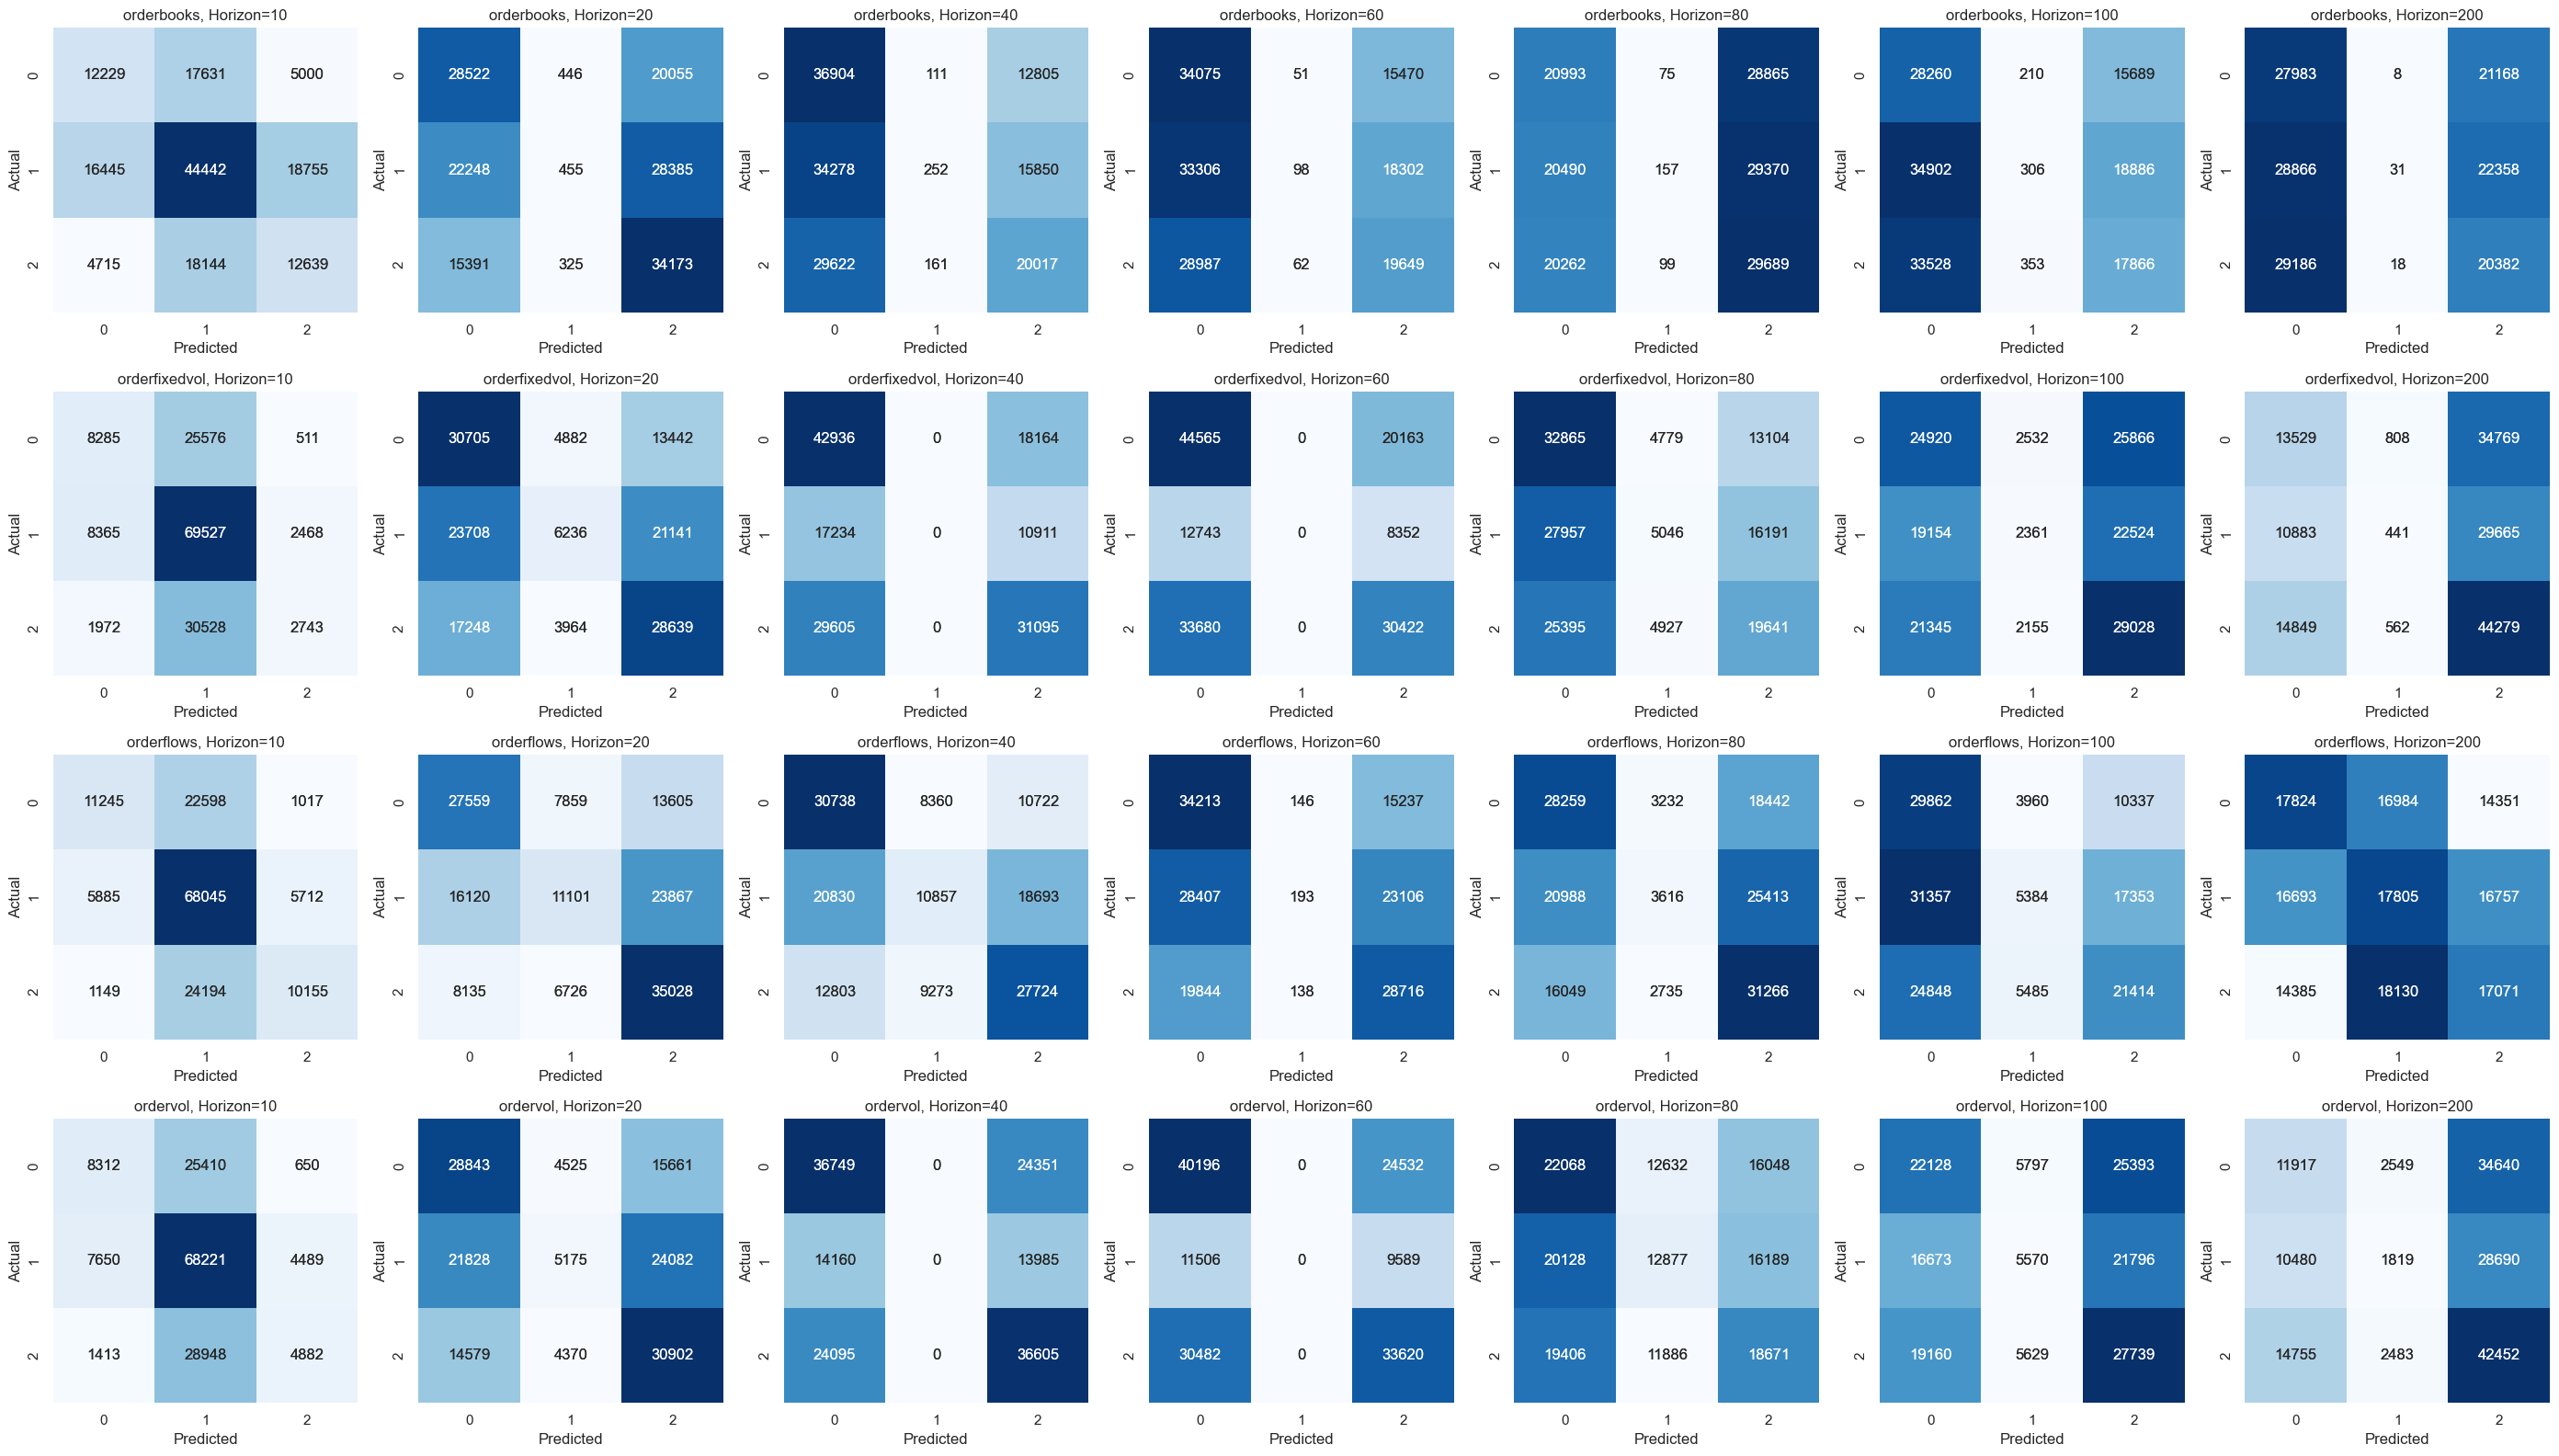

In [63]:
# Plotting
ticker = 'AAPL'
labelType = 'CATEGORICAL'

filtered = data.loc[
    (data['meta.ticker'] == ticker) &
    (data['meta.labelType'] == labelType)
]

df = filtered[['Ticker', 'meta.representation', 'meta.lookForwardHorizon', 'metrics.confusion_matrix', ]]

# Pivot the dataframe so that each row is a unique representation and each column is a lookForwardHorizon
pivot_df = df.pivot(index='meta.representation', columns='meta.lookForwardHorizon', values='metrics.confusion_matrix')

# Plot heatmaps for each cell in the pivot table
fig, axes = plt.subplots(nrows=pivot_df.shape[0], ncols=pivot_df.shape[1], figsize=(4 * pivot_df.shape[1], 4 * pivot_df.shape[0]))

for i, rep in enumerate(pivot_df.index):
    for j, horizon in enumerate(pivot_df.columns):
        cm = pivot_df.loc[rep, horizon]
        ax = axes[i, j] if pivot_df.shape[0] > 1 and pivot_df.shape[1] > 1 else axes[max(i, j)]
        sns.heatmap(np.array(cm), annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
        if isinstance(cm, list):
            sns.heatmap(np.array(cm), annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
            ax.set_title(f"{rep}, Horizon={horizon}")
            ax.set_xlabel('Predicted')
            ax.set_ylabel('Actual')
        else:
            ax.axis('off')
plt.tight_layout()
plt.show()

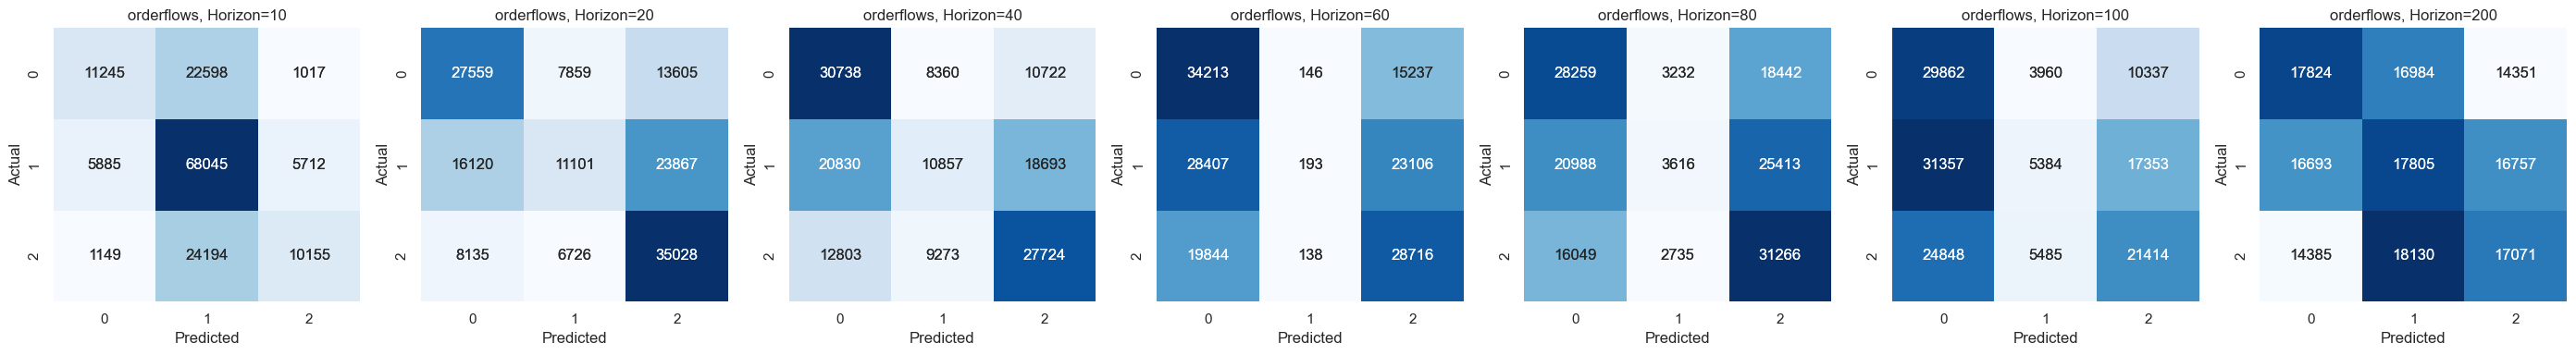

In [65]:
# Plotting
ticker = 'AAPL'
labelType = 'CATEGORICAL'
representation = 'orderflows'

filtered = data.loc[
    (data['meta.ticker'] == ticker) &
    (data['meta.labelType'] == labelType) &
    (data['meta.representation'] == representation)
    
]

df = filtered[['Ticker', 'meta.representation', 'meta.lookForwardHorizon', 'metrics.confusion_matrix', ]]

# Pivot the dataframe so that each row is a unique representation and each column is a lookForwardHorizon
pivot_df = df.pivot(index='meta.representation', columns='meta.lookForwardHorizon', values='metrics.confusion_matrix')

# Plot heatmaps for each cell in the pivot table
fig, axes = plt.subplots(nrows=pivot_df.shape[0], ncols=pivot_df.shape[1], figsize=(4 * pivot_df.shape[1], 4 * pivot_df.shape[0]))

for i, rep in enumerate(pivot_df.index):
    for j, horizon in enumerate(pivot_df.columns):
        cm = pivot_df.loc[rep, horizon]
        ax = axes[i, j] if pivot_df.shape[0] > 1 and pivot_df.shape[1] > 1 else axes[max(i, j)]
        sns.heatmap(np.array(cm), annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
        if isinstance(cm, list):
            sns.heatmap(np.array(cm), annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
            ax.set_title(f"{rep}, Horizon={horizon}")
            ax.set_xlabel('Predicted')
            ax.set_ylabel('Actual')
        else:
            ax.axis('off')
plt.tight_layout()
plt.show()

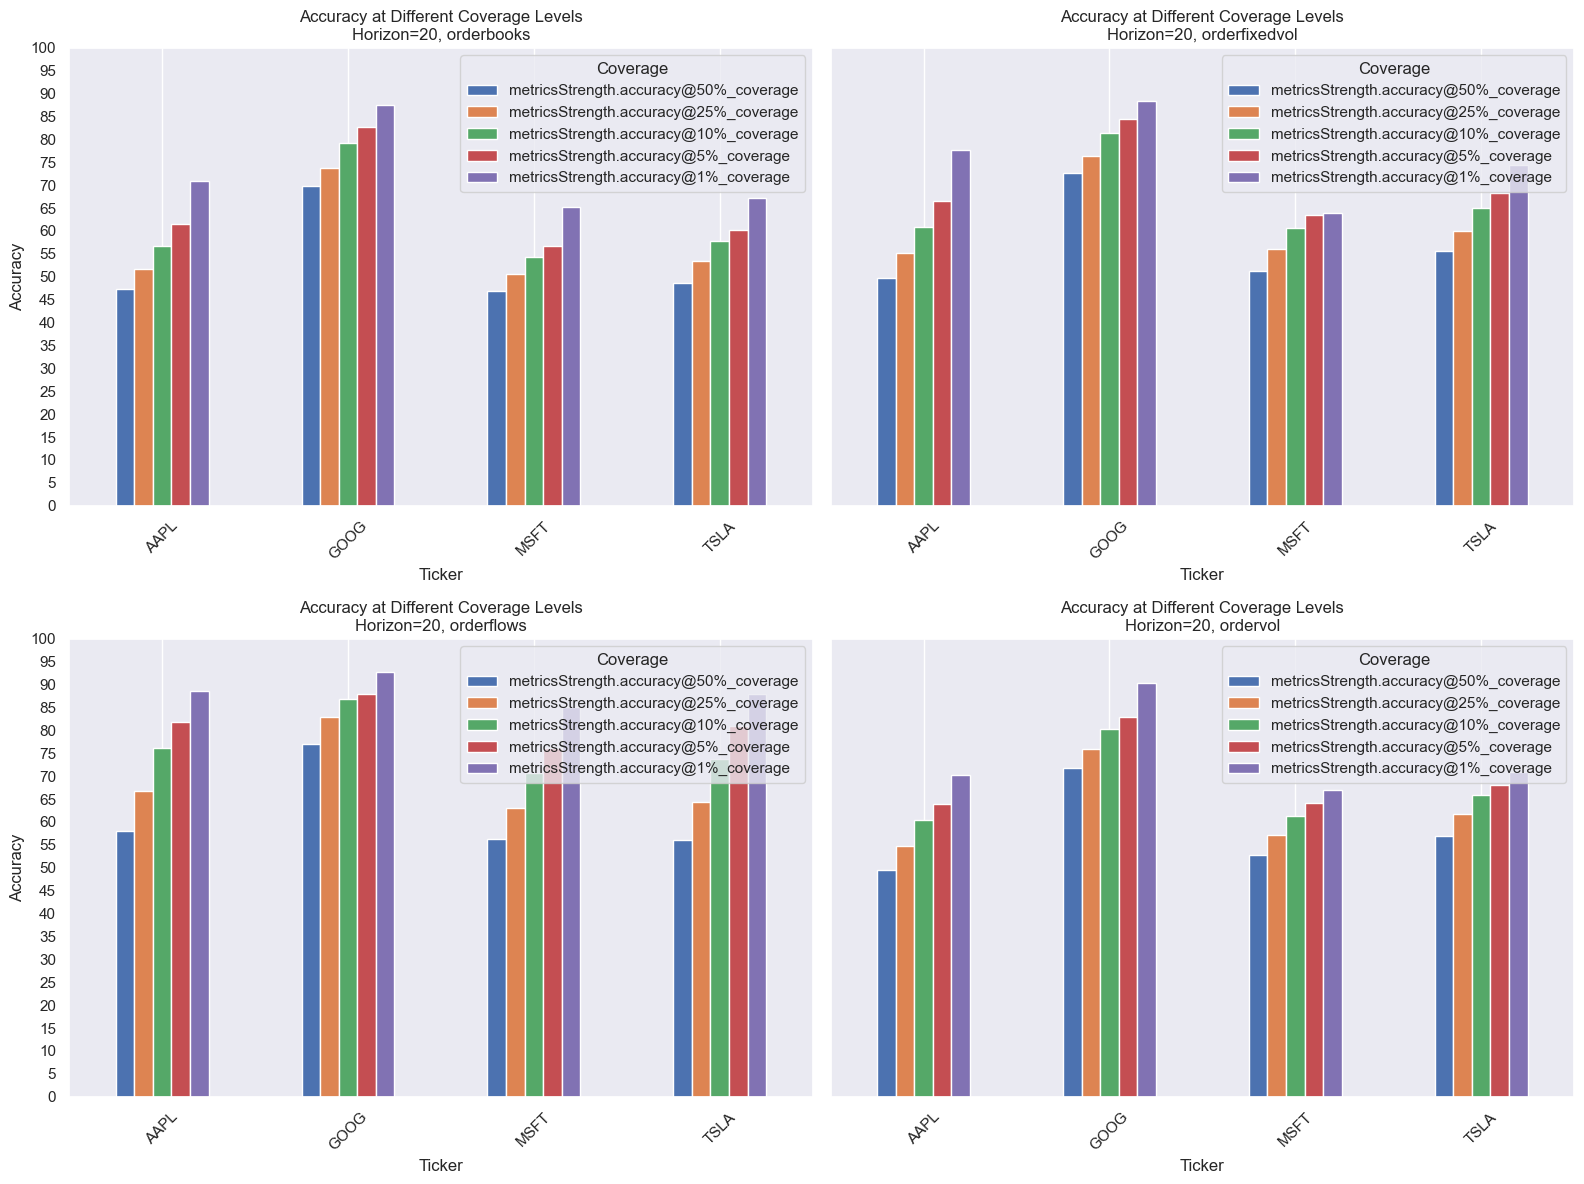

In [66]:
# Plot accuracy at different coverage levels for four representations in a 2x2 grid

representations = ['orderbooks', 'orderfixedvol', 'orderflows', 'ordervol']

tickers = ['AAPL', 'GOOG', 'MSFT', 'TSLA']

percentages = [50, 25, 10, 5, 1]

accuracy_cols = [
    f'metricsStrength.accuracy@{pcnt}%_coverage' for pcnt in percentages
]
fixed_horizon = 20

fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=True)


for ax, rep in zip(axes.flat, representations):
    df_bar = data.loc[
        (data['meta.representation'] == rep) &
        (data['meta.lookForwardHorizon'] == fixed_horizon) &
        (data['meta.labelType'] == labelType) &
        (data['Ticker'].isin(tickers))
    ]
    plot_df = df_bar[['Ticker'] + accuracy_cols].set_index('Ticker') * 100
    plot_df.plot(kind='bar', ax=ax)
    ax.set_title(f'Accuracy at Different Coverage Levels\nHorizon={fixed_horizon}, {rep}')
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Ticker')
    ax.legend(title='Coverage Level')
    ax.set_ylim(0, 1)
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.grid(axis='y')
    ax.legend(title='Coverage')
    ax.set_yticks(np.arange(0, 1.05, 0.05) * 100)
    plt.setp(ax.get_xticklabels(), rotation=45)
    # ax.set_xticks(np.arange(10, 210, 10))

plt.tight_layout()
plt.show()


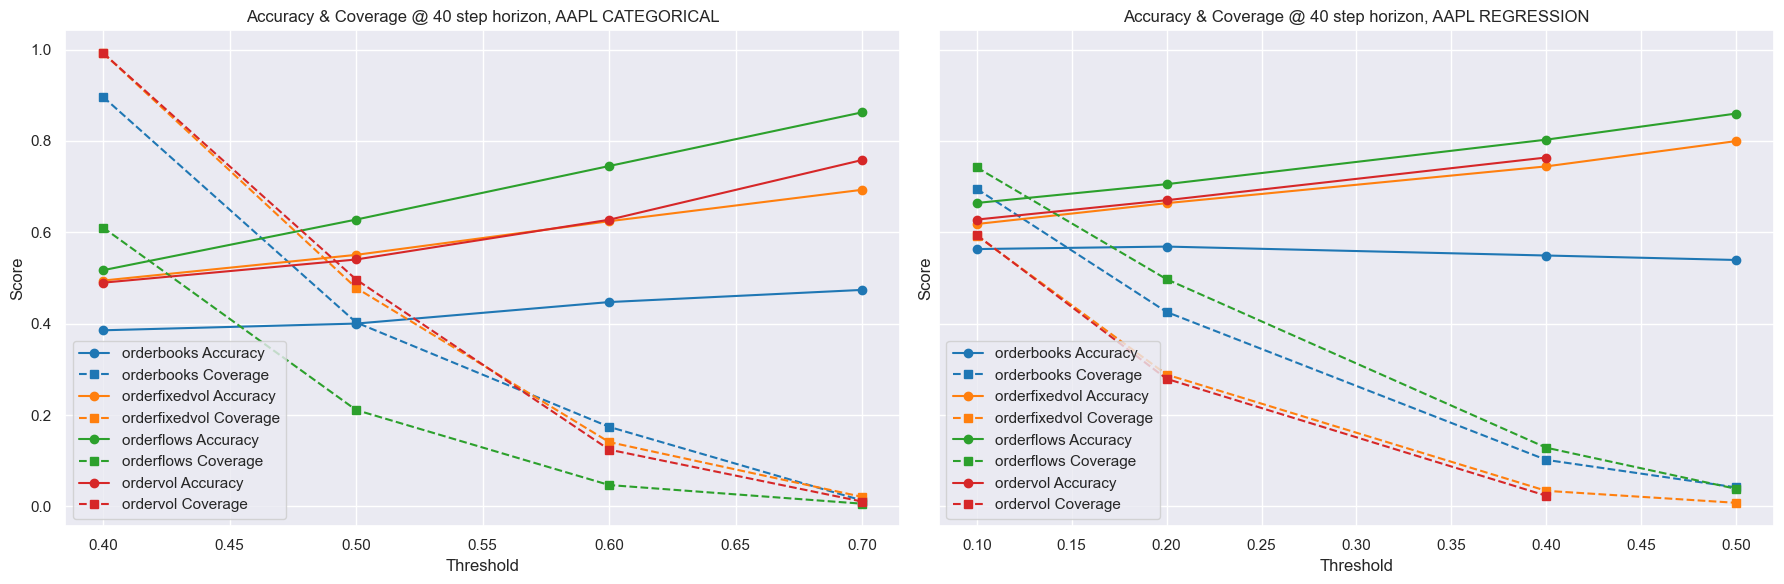

In [9]:
# Plot accuracy and coverage for each representation for AAPL at horizon=20, both CATEGORICAL and REGRESSION

horizon = 40
thresholds = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
thresholds_all  = [.1*i for i in range(10)]
sns.set()
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
colors = plt.cm.tab10.colors

coverage_lim = 0.005

for ax, labelType in zip(axes, ['CATEGORICAL', 'REGRESSION']):
    for idx, rep in enumerate(representations):
        subset = data[
            (data['meta.ticker'] == 'AAPL') &
            (data['meta.labelType'] == labelType) &
            (data['meta.lookForwardHorizon'] == horizon) &
            (data['meta.representation'] == rep)
        ]
        acc_y, cov_y, x_vals = [], [], []
        threshes = thresholds if labelType == 'CATEGORICAL' else thresholds_all
        for thresh in threshes:
            acc_col = f'metricsStrength.accuracy@>{thresh}'
            cov_col = f'metricsStrength.coverage@>{thresh}'
            if acc_col in subset.columns and cov_col in subset.columns and not subset.empty and subset.iloc[0][cov_col] > coverage_lim:
                acc_val = subset.iloc[0][acc_col]
                cov_val = subset.iloc[0][cov_col]
                if not pd.isna(acc_val) and not pd.isna(cov_val):
                    x_vals.append(thresh)
                    acc_y.append(acc_val)
                    cov_y.append(cov_val)
        color = colors[idx % len(colors)]
        ax.plot(x_vals, acc_y, marker='o', label=f'{rep} Accuracy', color=color)
        ax.plot(x_vals, cov_y, marker='s', label=f'{rep} Coverage', color=color, linestyle='--')
    ax.set_title(f'Accuracy & Coverage @ {horizon} step horizon, AAPL {labelType}')
    ax.set_xlabel('Threshold')
    ax.set_ylabel('Score')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


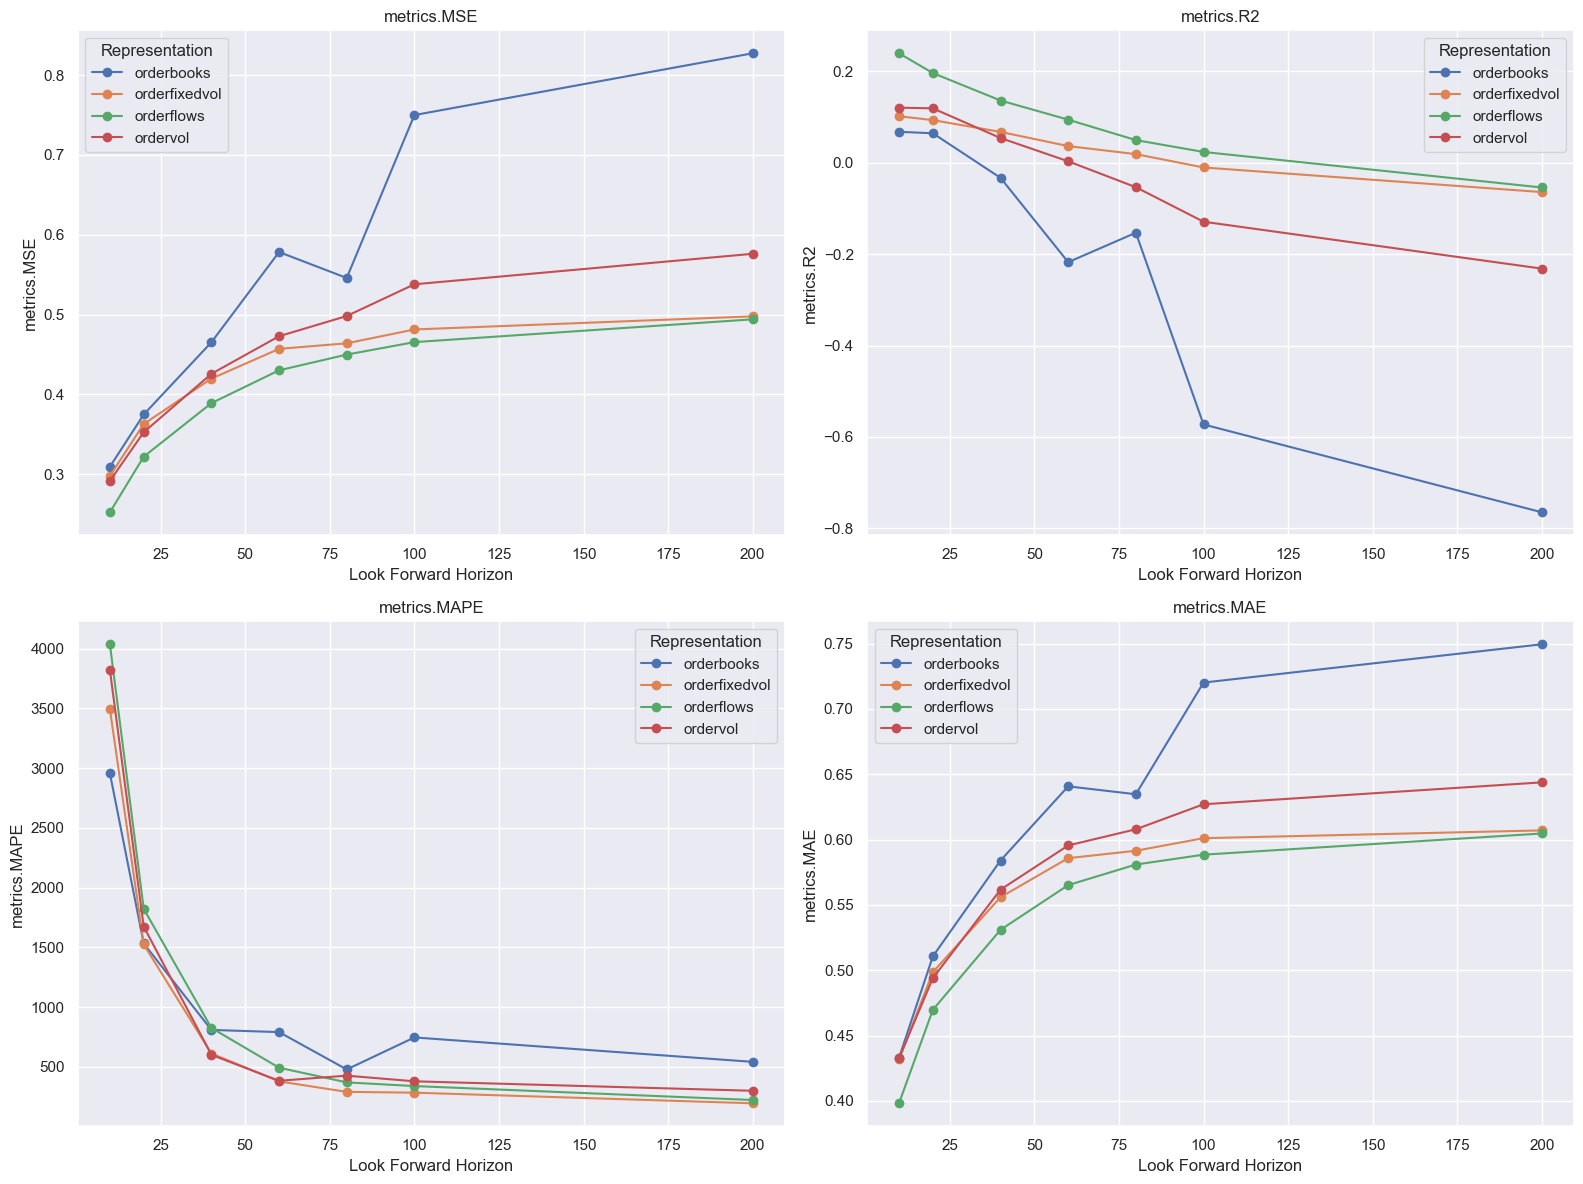

In [10]:
# Plot metrics for REGRESSION format: 'metrics.MSE', 'metrics.R2', 'metrics.MAPE', 'metrics.MAE'
ticker = 'AAPL'
metrics_to_plot = ['metrics.MSE', 'metrics.R2', 'metrics.MAPE', 'metrics.MAE']

regression_df = data[
    (data['meta.labelType'] == 'REGRESSION') &
    (data['Ticker'] == ticker)
].sort_values('meta.lookForwardHorizon')

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for ax, metric in zip(axes, metrics_to_plot):
    for rep in regression_df['meta.representation'].unique():
        subset = regression_df[regression_df['meta.representation'] == rep]
        ax.plot(
            subset['meta.lookForwardHorizon'],
            subset[metric],
            marker='o',
            label=rep
        )
    ax.set_title(metric)
    ax.set_xlabel('Look Forward Horizon')
    ax.set_ylabel(metric)
    ax.grid(True)
    ax.legend(title='Representation')

plt.tight_layout()
plt.show()

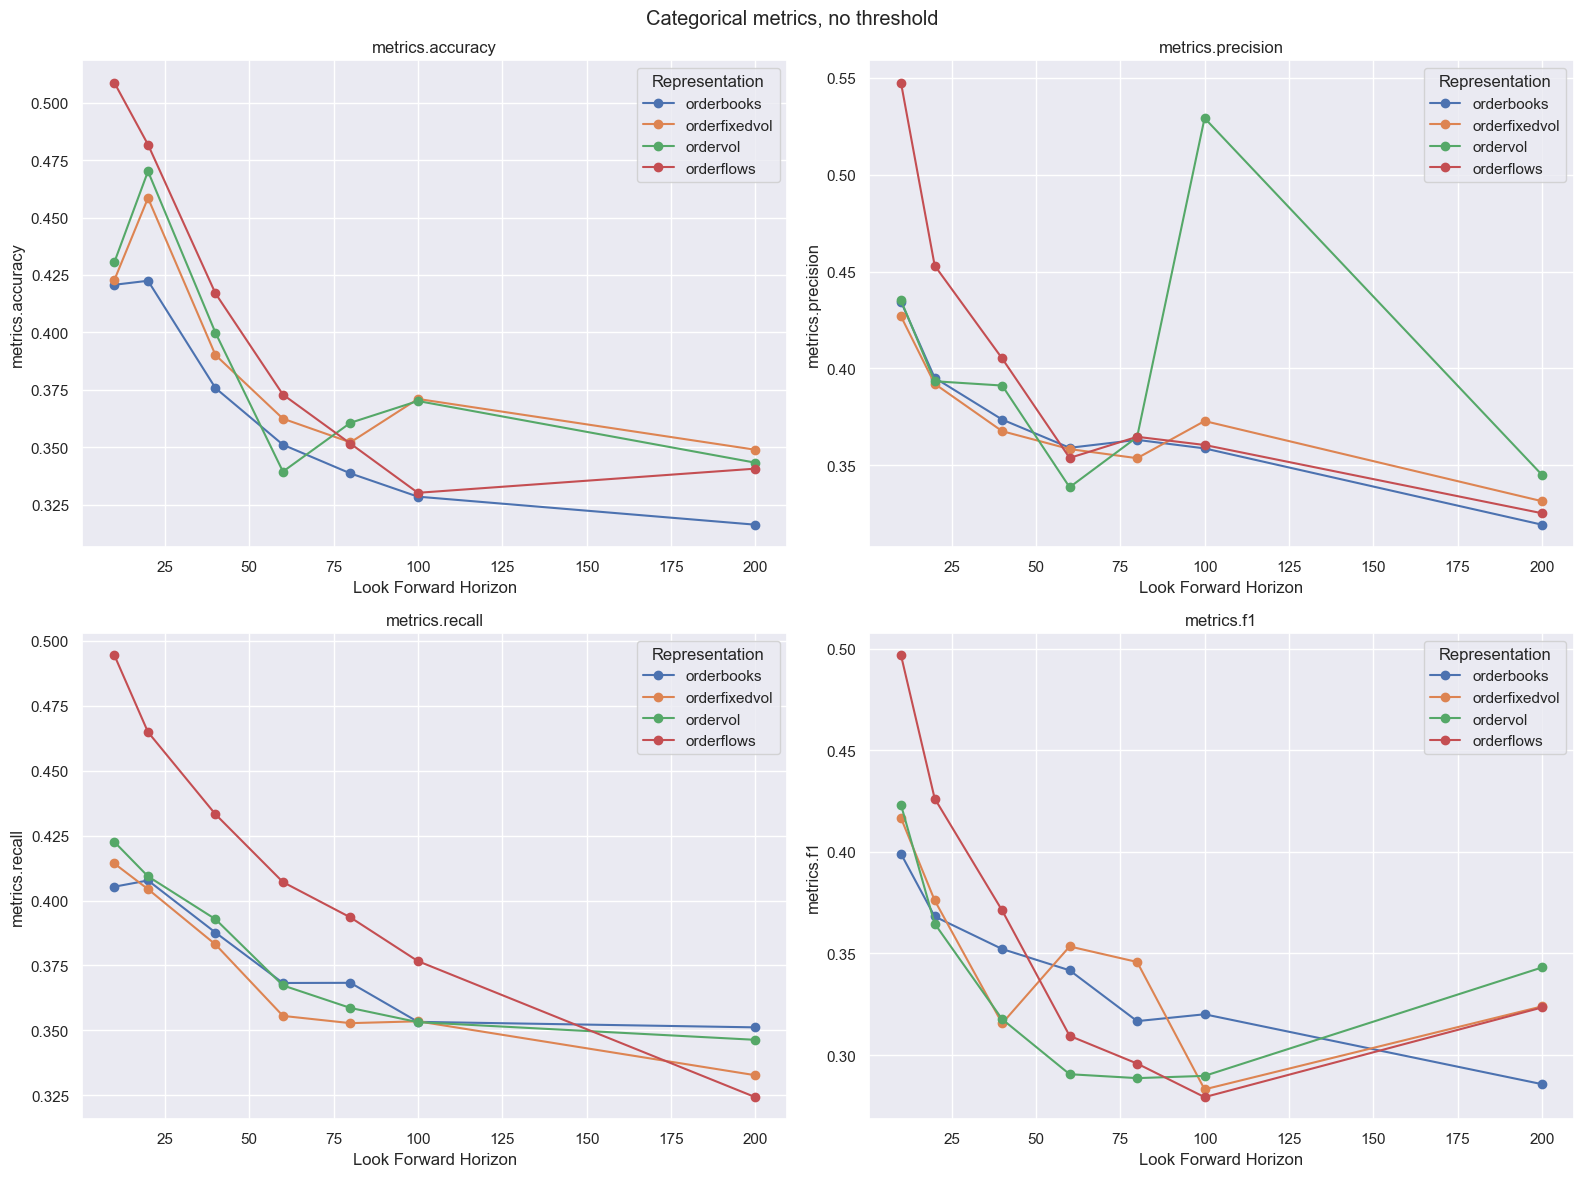

In [11]:
# Plot metrics for CATEGORICAL format: 'metrics.accuracy', 'metrics.precision', 'metrics.recall', 'metrics.f1'
ticker = 'MSFT'

metrics_to_plot = ['metrics.accuracy', 'metrics.precision', 'metrics.recall', 'metrics.f1']

categorical_df = data[
    (data['meta.labelType'] == 'CATEGORICAL') &
    (data['Ticker'] == ticker)
].sort_values(x_axis_col)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for ax, metric in zip(axes, metrics_to_plot):
    for rep in categorical_df['meta.representation'].unique():
        subset = categorical_df[categorical_df['meta.representation'] == rep]
        ax.plot(
            subset[x_axis_col],
            subset[metric],
            marker='o',
            label=rep
        )
    ax.set_title(metric)
    ax.set_xlabel('Look Forward Horizon')
    ax.set_ylabel(metric)
    ax.grid(True)
    ax.legend(title='Representation')

fig.suptitle("Categorical metrics, no threshold")

plt.tight_layout()
plt.show()

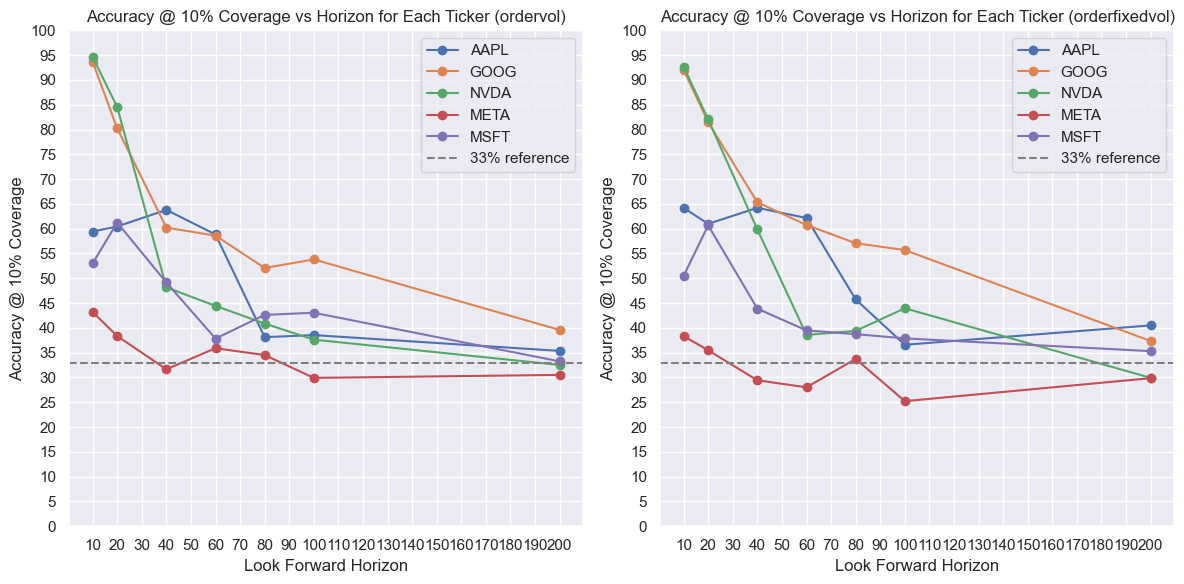

In [12]:
# Plot accuracy@10%_coverage vs horizon for each ticker, for representation 'orderflows'


fig, axs = plt.subplots(1,2, figsize=(12, 6))
representations = ['ordervol', 'orderfixedvol']
labelType = "CATEGORICAL"
pcnt = 10
y_axis_col = f'metricsStrength.accuracy@{pcnt}%_coverage'
x_axis_col = 'meta.lookForwardHorizon'

tickers = ['AAPL', 'GOOG', 'NVDA', 'META', 'MSFT']

for idx, representation in enumerate(representations):
    for ticker in tickers:
        df = data[
            (data['meta.representation'] == representation) &
            (data['Ticker'] == ticker) &
            (data['meta.labelType'] == labelType)
        ].sort_values(x_axis_col)
        axs[idx].plot(
            df[x_axis_col],
            df[y_axis_col] * 100,
            marker='o',
            label=ticker
        )
    axs[idx].set_xlabel('Look Forward Horizon')
    axs[idx].set_ylabel(f'Accuracy @ {pcnt}% Coverage')
    axs[idx].set_title(f'Accuracy @ {pcnt}% Coverage vs Horizon for Each Ticker ({representation})')
    axs[idx].legend(title='Ticker')

    axs[idx].set_xlabel('Look Forward Horizon')
    axs[idx].set_ylabel(f'Accuracy @ {pcnt}% Coverage')
    axs[idx].set_title(f'Accuracy @ {pcnt}% Coverage vs Horizon for Each Ticker ({representation})')
    axs[idx].legend(title='Ticker')
    hline = 33
    axs[idx].axhline(hline, color='gray', linestyle='--', label='33% reference')
    axs[idx].legend()
    axs[idx].grid(True)
    
    axs[idx].set_yticks(np.arange(0, 1.05, 0.05) * 100)
    plt.setp(ax.get_xticklabels(), rotation=45)
    axs[idx].set_xticks(np.arange(10, 210, 10))
plt.tight_layout()
plt.show()

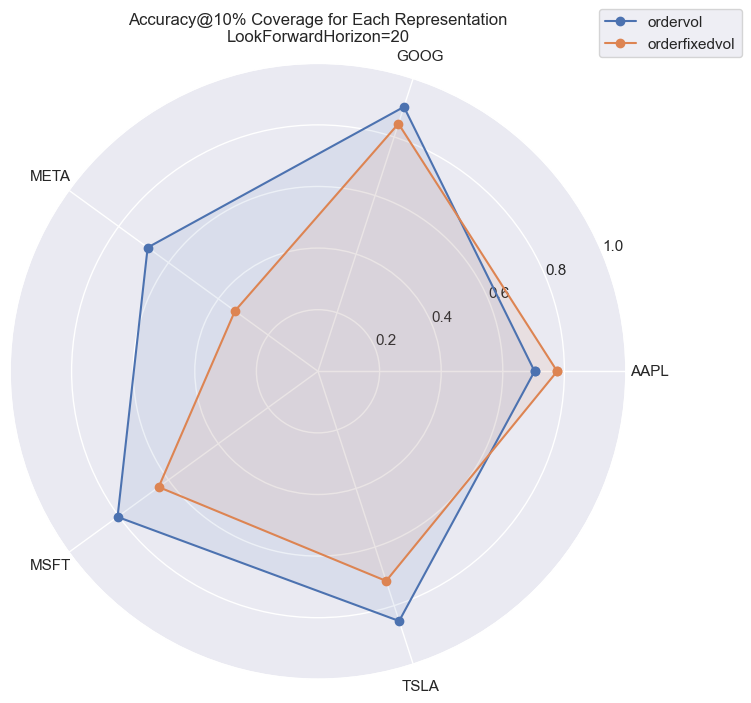

In [13]:
# Spider (Radar) plot: Compare accuracy for each representation across stocks at horizon=20

horizon = 20
accuracy_col = 'metricsStrength.accuracy@1%_coverage'
tickers = ['AAPL', 'GOOG', 'META', 'MSFT', 'TSLA']
# Prepare data for radar plot: each representation is a line, corners are stocks
radar_data = []
for rep in representations:
    values = []
    for ticker in tickers:
        row = data[
            (data['meta.representation'] == rep) &
            (data['Ticker'] == ticker) &
            (data['meta.lookForwardHorizon'] == horizon)
        ]
        if not row.empty:
            values.append(row.iloc[0][accuracy_col])
        else:
            values.append(0)
    radar_data.append(values)

angles = np.linspace(0, 2 * np.pi, len(tickers), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for rep, values in zip(representations, radar_data):
    vals = values + values[:1]
    ax.plot(angles, vals, marker='o', label=rep)
    ax.fill(angles, vals, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(tickers)
ax.set_title(f'Accuracy@10% Coverage for Each Representation\nLookForwardHorizon={horizon}')
ax.set_ylim(0, 1)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()
